In [6]:
# Main URL = http://jakevdp.github.io/blog/2017/03/03/reproducible-data-analysis-in-jupyter/
# Quick utility to embed the videos below
from IPython.display import YouTubeVideo
def embed_video(index, playlist='PLYCpMb24GpOC704uO9svUrihl-HY1tTJJ'):
    return YouTubeVideo('', index=index - 1, list=playlist, width=600, height=350)

In [7]:
# Part 1: Loading and Visualizing Data
embed_video(1)

In [8]:
URL = 'https://data.seattle.gov/api/views/65db-xm6k/rows.csv?accessType=DOWNLOAD'
from urllib.request import urlretrieve
urlretrieve(URL, 'Fremount.csv')

('Fremount.csv', <http.client.HTTPMessage at 0x1667a1734a8>)

In [9]:
import pandas as pd
data = pd.read_csv('Fremount.csv', index_col = 'Date', parse_dates=True)
data.head()

,Fremont Bridge West Sidewalk,Fremont Bridge East Sidewalk
Date,,
2012-10-03 00:00:00,4.0,9.0
2012-10-03 01:00:00,4.0,6.0
2012-10-03 02:00:00,1.0,1.0
2012-10-03 03:00:00,2.0,3.0
2012-10-03 04:00:00,6.0,1.0


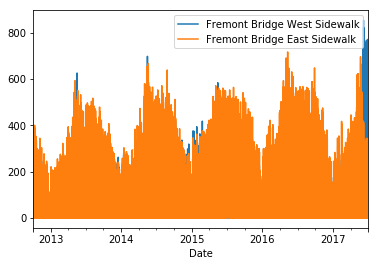

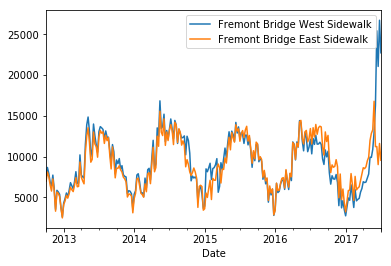

In [10]:
%matplotlib inline
data.plot();
data.resample('W').sum().plot();

In [11]:
# Part 2: Further Data Exploration
embed_video(2)

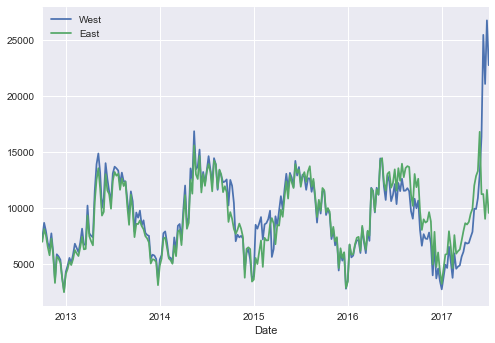

In [12]:
import matplotlib.pyplot as plt
plt.style.use('seaborn')
data.columns = ['West', 'East']
data.resample('W').sum().plot();

(0, 1059460.05)

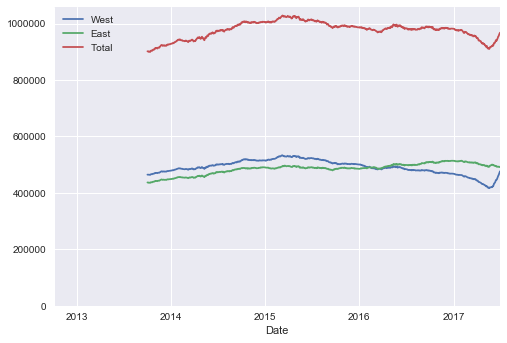

In [13]:
data['Total'] = data['West'] + data['East']
ax = data.resample('D').sum().rolling(365).sum().plot();
ax.set_ylim(0, None)

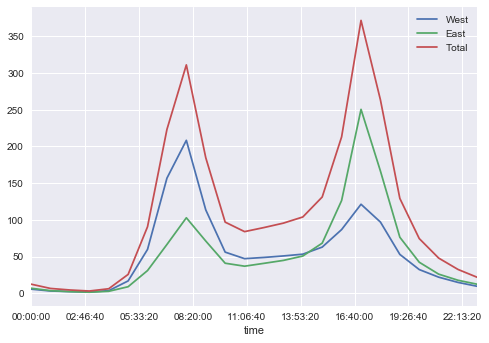

In [14]:
data.groupby(data.index.time).mean().plot();

In [15]:
pivoted = data.pivot_table('Total', index=data.index.time, columns = data.index.date)
pivoted.iloc[:5, :5]

,2012-10-03,2012-10-04,2012-10-05,2012-10-06,2012-10-07
00:00:00,13.0,18.0,11.0,15.0,11.0
01:00:00,10.0,3.0,8.0,15.0,17.0
02:00:00,2.0,9.0,7.0,9.0,3.0
03:00:00,5.0,3.0,4.0,3.0,6.0
04:00:00,7.0,8.0,9.0,5.0,3.0


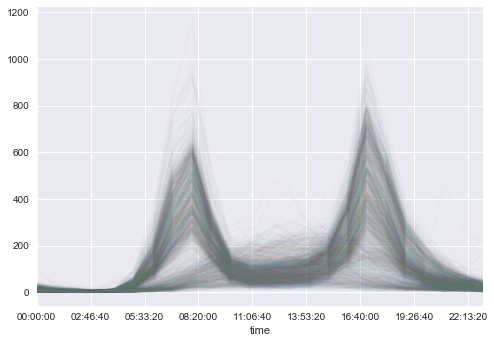

In [16]:
pivoted.plot(legend=False, alpha = 0.02);

In [17]:
# Part 3: Version Control with Git & GitHub
embed_video(3)